# Ordinary Least Squares (OLS)


[Acknowledgments Page](https://ds100.org/fa23/acks/)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
pd.options.mode.chained_assignment = None 
warnings.simplefilter(action='ignore', category=UserWarning)
np.random.seed(42)

from plotly.subplots import make_subplots
import plotly.graph_objects as go

## Ex 1: Predicting MSRP

Let's explore the Python syntax for performing ordinary least squares programmatically.

Today, we will work a dataset about hybrid cars.

In [3]:
hybrid = pd.read_csv('data/hybrid.csv')
hybrid.head()

,vehicle,year,msrp,acceleration,mpg,class
0,Prius (1st Gen),1997,24509.74,7.46,41.26,Compact
1,Tino,2000,35354.97,8.20,54.10,Compact
2,Prius (2nd Gen),2000,26832.25,7.97,45.23,Compact
3,Insight,2000,18936.41,9.52,53.00,Two Seater
4,Civic (1st Gen),2001,25833.38,7.04,47.04,Compact


Suppose we want to use this dataset to build a model to predict MSRP.

Let's start by examining the correlation between MSRP and the other variables in the dataset:

In [4]:
hybrid.corr(numeric_only=True)

,year,msrp,acceleration,mpg
year,1.000000,0.209786,0.359429,-0.169938
msrp,0.209786,1.000000,0.695578,-0.531826
acceleration,0.359429,0.695578,1.000000,-0.506070
mpg,-0.169938,-0.531826,-0.506070,1.000000


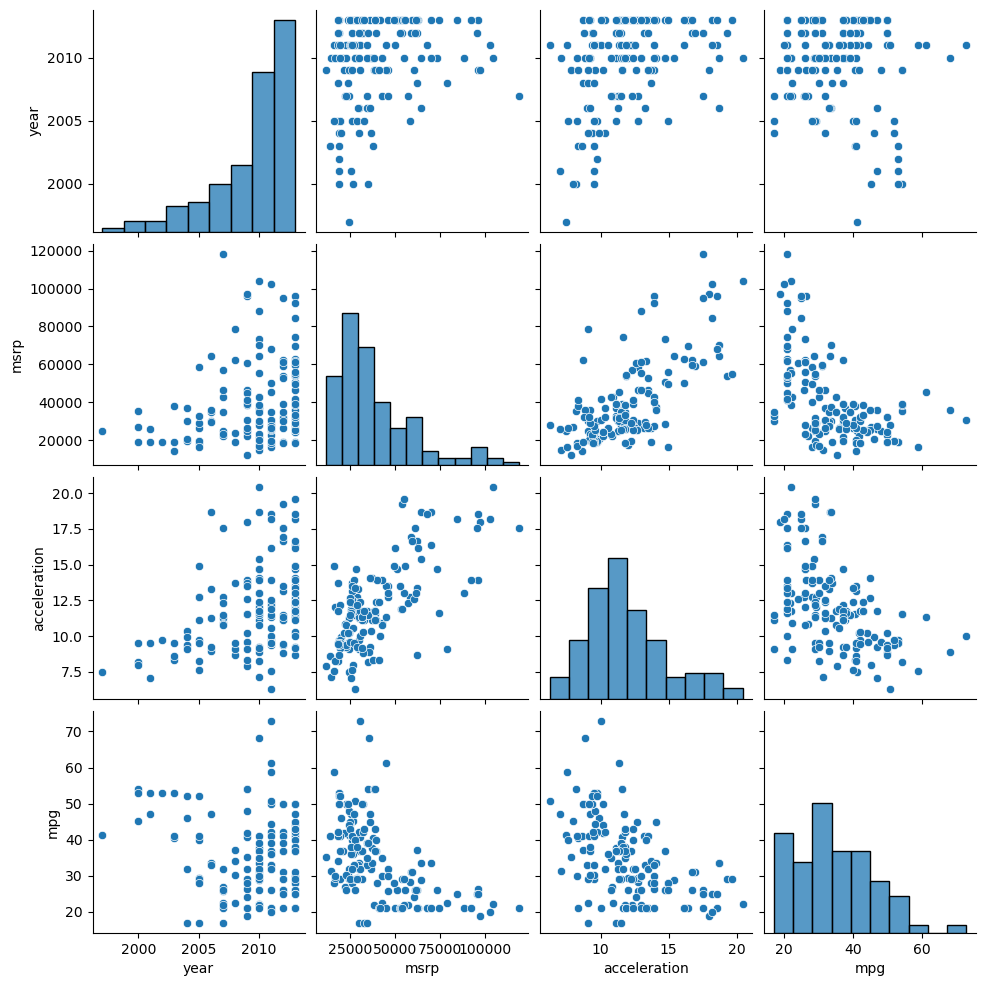

In [8]:
# We can also plot the pairwise scatterplots
sns.pairplot(hybrid)

## Review:  SLR: Least Squares Regression

We'll start by constructing a least squares regression model to predict the MSRP from the acceleration. Our model will take the form:

$$\text{MSRP} = \theta_0 + \theta_1 \text{acceleration}$$


In [ ]:
#Visualize this data:
sns.scatterplot(x=hybrid["acceleration"], y=hybrid["msrp"])

## SLR via `sklearn`


There are three steps to creating and using a model in `sklearn`. 

**(1) Initialize an instance of the model class**

`sklearn` stores "templates" of useful models for machine learning. We begin the modeling process by making a "copy" of one of these templates for our own use. Model initialization looks like `ModelClass()`, where `ModelClass` is the type of model we wish to create.

For now, let's create a linear regression model using `LinearRegression()`. 

`my_model` is now an instance of the `LinearRegression` class. You can think of it as the "idea" of a linear regression model. We haven't trained it yet, so it doesn't know any model parameters and cannot be used to make predictions. In fact, we haven't even told it what data to use for modeling! It simply waits for further instructions.

In [ ]:
import sklearn.linear_model as lm

my_model = lm.LinearRegression()

my_model

**(2) Train the model using `.fit`**

Before the model can make predictions, we will need to fit it to our training data. When we fit the model, `sklearn` will run gradient descent behind the scenes to determine the optimal model parameters. It will then save these model parameters to our model instance for future use. 

All `sklearn` model classes include a `.fit` method. This function is used to fit the model. It takes in two inputs: the design matrix, `X`, and the target variable, `y`. 

Let's start by fitting a model with just one feature: the acceleration. We create a design matrix `X` by pulling out the `"acceleration"` column from the DataFrame. Notice that we use **double brackets** to extract this column. Why double brackets instead of just single brackets? The `.fit` method, by default, expects to receive **2-dimensional** data – some kind of data that includes both rows and columns. Writing `hybrid["acceleration"]` would return a 1D `Series`, causing `sklearn` to error. We avoid this by writing `hybrid[["acceleration"]]` to produce a 2D DataFrame. 

In [ ]:
# .fit expects a 2D data design matrix, so we use double brackets to extract a DataFrame
X = hybrid[["acceleration"]]
y = hybrid["msrp"]

my_model.fit(X, y)

And in just three lines of code, our model has determined the optimal model parameters! Our single-feature model takes the form:

$$\text{MSRP} = \theta_0 + \theta_1 \text{acceleration}$$

Note that `LinearRegression` will automatically include an intercept term. (If you **don't** want to include an intercept you should use `lm.LinearRegression(fit_intercept=False)`)

The fitted model parameters are stored as attributes of the model instance. `my_model.intercept_` will return the value of $\hat{\theta}_0$ as a scalar. `my_model.coef_` will return all values $\hat{\theta}_1, 
\hat{\theta}_1, ...$ in an array. Because our model only contains one feature, we see just the value of $\hat{\theta}_1$ in the cell below.

In [ ]:
# The intercept term, theta_0
my_model.intercept_

In [ ]:
# All parameters theta_1, ..., theta_p
my_model.coef_

In [ ]:
### Model:
print ("SLR Model: MSRP =", round(my_model.intercept_, 0), "+", round(my_model.coef_[0], 0),"acceleration")

**(3) Use the fitted model to make predictions**

Now that the model has been trained, we can use it to make predictions! To do so, we use the `.predict` method. `.predict` takes in one argument, the design matrix that should be used to generate predictions. To understand how the model performs on the training set, we would pass in the training data. Alternatively, to make predictions on unseen data, we would pass in a new dataset that wasn't used to train the model.

Below, we call `.predict` to generate model predictions on the original training data. As before, we use double brackets to ensure that we extract 2-dimensional data.

In [ ]:
y_hat = my_model.predict(hybrid[["acceleration"]])

In [ ]:
my_model.predict([[13]])[0]

### Analyze Model Fit

#### RMSE:

In [ ]:
print(f"The RMSE of the SLR model is {np.sqrt(np.mean((y-y_hat)**2))}")

#### $r^2$

In [ ]:
my_model.score(X,y)



### Visualizing Model and Residuals


Next, we **plot the residuals.** 

When we make a residual plot, we'll put the residuals on the y-axis.  But we have an option of what to use for the x-axis:  either the single input feature (in this case `acceleration` OR the fitted y-values (i.e. the predicted y output of the model).  When we have more than one feature i.e. in Multiple Linear Regression, we usually just plot the residuals vs the fitted y-values.  


For reference we'll provide both residual plots below.  We also replot the original dataset and our SLR model.



In [ ]:
predicted_msrp = y_hat
fig, ax = plt.subplots(1,3, figsize=(15, 5))

ax[0].scatter(hybrid["acceleration"], hybrid["msrp"])
ax[0].plot(hybrid["acceleration"], predicted_msrp, 'r--')
ax[0].set_xlabel('acc')
ax[0].set_ylabel('msrp')
ax[0].set_title('SLR')



ax[1].scatter(hybrid["acceleration"], hybrid["msrp"] - predicted_msrp)
ax[1].axhline(0, c='black', linewidth=1)
ax[1].set_xlabel(r'acc')
ax[1].set_ylabel(r'Residuals: $y - \hat{y}$');
ax[1].set_title("Residuals vs. acc")

ax[2].scatter(predicted_msrp, hybrid["msrp"] - predicted_msrp)
ax[2].axhline(0, c='black', linewidth=1)
ax[2].set_xlabel(r'Fitted Values $\hat{y}$')
ax[2].set_ylabel(r'Residuals: $y - \hat{y}$');
ax[2].set_title("Residuals vs. predicted msrp")


# Multiple Linear Regression:  Adding More Features

What if we wanted to add more features?

A quick way to visualize how your dependent variable varies with the other variables in your dataset is to do a pairwise correlation plot:

In [ ]:
hybrid.corr(numeric_only=True)

What if we wanted a model with two features? 

$$\text{MSRP} = \theta_0 + \theta_1 \text{acceleration}+ \theta_2 \text{mpg}$$



In [ ]:
px.scatter_3d(
    hybrid, 
    x="mpg", y="acceleration", z="msrp",
    hover_name="vehicle", 
    color="class", 
    height=800
)

We repeat this three-step process by intializing a new model object, then calling `.fit` and `.predict` as before.

In [ ]:
# Step 1: initialize LinearRegression model
two_feature_model = lm.LinearRegression()

# Step 2: fit the model
X_two_features = hybrid[["acceleration", "mpg"]]
y = hybrid["msrp"]

two_feature_model.fit(X_two_features, y)




In [ ]:
two_feature_model.intercept_

In [ ]:
two_feature_model.coef_

In [ ]:
# Step 3: make predictions
y_hat_two_features = two_feature_model.predict(X_two_features)

### Visualize Model in 3D (only possible when using 2 features)

In [ ]:
a=two_feature_model.coef_[0]
b=two_feature_model.coef_[1]
c=two_feature_model.intercept_

mpg_range = np.arange(10, 80)
acceleration_range = np.arange(5, 25)
predictions = pd.DataFrame(columns = ["mpg", "acc", "pred"])
for mpg in mpg_range:
    for acc in acceleration_range: 
        pred = a * acc + b * mpg + c
        predictions.loc[len(predictions.index)]=[mpg, acc, pred]



fig = px.scatter_3d(
    hybrid, 
    x="mpg", y="acceleration", z="msrp",
    hover_name="vehicle", 
    color="class", 
    height=800
)
fig.add_surface(
    x = mpg_range, y = acceleration_range,
    z = np.array(predictions["pred"]).reshape(len(mpg_range), len(acceleration_range)).T
)

### RMSE:

In [ ]:
print(f"The RMSE of the model is {np.sqrt(np.mean((y-y_hat_two_features)**2))}")

### Multiple $R^2$

Let's compute the coefficient of determination, or **multiple $R^2$**, for our model.

In [ ]:
r2 = np.var(two_feature_model.predict(X_two_features)) / np.var(hybrid["msrp"])
r2

There's a built-in method to calculate this:

In [ ]:
two_feature_model.score(X_two_features, y)

### Adjusted Multiple R^2

Since Multiple R2 always increases as you add more predictors to a model, adjusted R2 can serve as a metric that tells you how useful a model is, adjusted for the number of predictors in a model.

In [ ]:
# Adjusted Multiple R2
1 - (1-two_feature_model.score(X_two_features, y))*(len(y)-1)/(len(y)-X_two_features.shape[1]-1)

Notice that this is better (i.e. closer to 1) than the r^2 for our SLR model:

In [ ]:
my_model.score(X,y)

### Analyze Residuals:

In [ ]:

plt.scatter(two_feature_model.predict(X_two_features), hybrid["msrp"] - two_feature_model.predict(X_two_features))
plt.axhline(0, c='black', linewidth=1)
plt.xlabel(r'Fitted Values $\hat{y}$')
plt.ylabel("residuals")
plt.title ("residuals vs predicted msrp")


## Feature Engineering: 


Next we will explore a key part of data science, **feature engineering**: _the process of transforming the representation of model inputs to enable better model approximation._  Feature engineering enables you to:

1. **encode** non-numeric features to be used as inputs to common numeric models
1. capture **domain knowledge** (e.g., the perceived loudness or sound is the log of the intensity)
1. **transform** complex relationships into simple linear relationships



### Fitting Non-linear Data


We could try to improve our predictions by defining a more complex equation:

$$\text{MSRP} = \theta_0 + \theta_1 \text{acceleration}+ \theta_2 \text{mpg}+ \theta_3({acceleration})^2 + \theta_4\sqrt{mpg}$$





We repeat this three-step process by intializing a new model object, then calling `.fit` and `.predict` as before.

In [ ]:
hybrid["acc_sq"] = hybrid["acceleration"]**2

In [ ]:
hybrid["mpg_sqrt"] = np.sqrt(hybrid["mpg"])

In [ ]:
hybrid.head()

In [ ]:
# Step 1: initialize LinearRegression model
four_feature_model = lm.LinearRegression()

# Step 2: fit the model
X_four_features = hybrid[["acceleration","mpg","acc_sq","mpg_sqrt"]]
y = hybrid["msrp"]

four_feature_model.fit(X_four_features, y)




In [ ]:
four_feature_model.intercept_

In [ ]:
four_feature_model.coef_

In [ ]:
# Step 3: make predictions
y_hat_four_features = four_feature_model.predict(X_four_features)


$$\text{MSRP} = 263351 -4986( \text{acc})+ 5045 (\text{mpg})+ 342({acc})^2 + -67250\sqrt{mpg}$$



### RMSE:

In [ ]:
print(f"The RMSE of the model is {np.sqrt(np.mean((y-y_hat_four_features)**2))}")

### Adjusted Multiple $R^2$

In [ ]:
1 - (1-four_feature_model.score(X_four_features, y))*(len(y)-1)/(len(y)-X_four_features.shape[1]-1)

### Analyze Residuals:

In [ ]:
#Analyze Residuals:

plt.scatter(y_hat_four_features, y-y_hat_four_features)
plt.axhline(0, c='black', linewidth=1)
plt.xlabel("predicted msrp")
plt.ylabel("residuals")
plt.title("Residuals for Model with 4 features")


In [ ]:
#Compare Residuals from our 3 models:

fig, ax = plt.subplots(1,3, figsize=(15, 5))


ax[0].scatter(predicted_msrp, hybrid["msrp"] - predicted_msrp)
ax[0].axhline(0, c='black', linewidth=1)
ax[0].set_xlabel(r'Fitted Values $\hat{y}$')
ax[0].set_ylabel(r'Residuals: $y - \hat{y}$');
ax[0].set_title("Residuals for single feature model")
ax[0].set_xlim(9000,101000)


ax[1].scatter(two_feature_model.predict(X_two_features), hybrid["msrp"] - two_feature_model.predict(X_two_features))
ax[1].axhline(0, c='black', linewidth=1)
ax[1].set_xlabel(r'Fitted Values $\hat{y}$')
ax[1].set_ylabel(r'Residuals: $y - \hat{y}$');
ax[1].set_title("Residuals for 2 feature model")
ax[1].set_xlim(9000,101000)



ax[2].scatter(y_hat_four_features, hybrid["msrp"] - y_hat_four_features)
ax[2].axhline(0, c='black', linewidth=1)
ax[2].set_xlabel(r'Fitted Values $\hat{y}$')
ax[2].set_ylabel(r'Residuals: $y - \hat{y}$');
ax[2].set_title("Residuals for 4 feature model")
ax[2].set_xlim(9000,101000)



## Visualization of 4 feature model (acc, mpg, acc^2 and mpg^2) (Only possible because we are using 2 features and their transformations)

In [ ]:
a=four_feature_model.coef_[0]
b=four_feature_model.coef_[1]
c=four_feature_model.coef_[2]
d=four_feature_model.coef_[3]
e=four_feature_model.intercept_


mpg_range = np.arange(10, 80)
acceleration_range = np.arange(5, 25)
predictions=pd.DataFrame(columns =["mpg", "acc", "pred"])
for mpg in mpg_range:
    for acc in acceleration_range: 
        pred = a*acc + b*mpg + c*acc**2 + d*np.sqrt(mpg) + e
        predictions.loc[len(predictions.index)]=[mpg, acc, pred]
        
fig = px.scatter_3d(
    hybrid, 
    x="mpg", y="acceleration", z="msrp",
    hover_name="vehicle", 
    color="class", 
    height=800
)
fig.add_surface(
    x = mpg_range, y = acceleration_range,
    z = np.array(predictions["pred"]).reshape(len(mpg_range), len(acceleration_range)).T,
    showscale=False
)

In [ ]:
# Testing

In [ ]:
ax[1].scatter(two_feature_model.predict(X_two_features), hybrid["msrp"] - two_feature_model.predict(X_two_features))

## More Feature Engineering:  

### Adding Qualitative Features



What about qualitative features?  There isn't a way to calculate a "correlation" between msrp and class. 

To see if additional qualitative variables might be helpful, we can plot the residuals from the fitted model against a variable that is not in the model. If we see patterns, that indicates we might want to include this additional feature or a transformation of it. 

In [ ]:

m4_error = hybrid["msrp"] - y_hat_four_features


hybrid= hybrid.assign(m4_errors=m4_error)

In [ ]:
hybrid.head()


In [ ]:
fig=px.scatter(hybrid, x='class', y='m4_errors')

fig.add_hline(0, line_width=2, line_dash='dash', opacity=1)
fig.show()

In [ ]:
fig=px.box(hybrid, x='class', y='m4_errors')

fig.add_hline(0, line_width=2, line_dash='dash', opacity=1)
fig.show()

This plot shows us that the distribution of errors appears shifted by car class type. Ideally, the median of each class's box plot lines up with 0 on the y-axis (meaning there was no difference in prediction by city). Instead, we see some variation (especially with Minivans, Pickup Trucks and Large vehicles).  From a context point of view, it makes sense for car type to impact sale price. In the next section, we show how to incorporate a nominal variable into a linear model. 

### One-Hot Encoding


One-Hot encoding, sometimes also called **dummy encoding** is a simple mechanism to encode categorical data as real numbers such that the magnitude of each dimension is meaningful.  Suppose a feature can take on $k$ distinct values (e.g., $k=50$ for 50 states in the United Stated).  For each distinct _possible_ value a new feature (dimension) is created.  For each record, all the new features are set to zero except the one corresponding to the value in the original feature. 

The term one-hot encoding comes from a digital circuit encoding of a categorical state as particular "hot" wire.





For example, we can use one-hot encoding to incorporate the car's class as an input into a regression model.

Suppose we want to add `class` to our model above to predict MSRP.  


Because `class` is non-numeric, we will apply one-hot encoding before fitting a model.

In [ ]:
hybrid[["class"]]

## One-Hot Encoding in Scikit-Learn

The `OneHotEncoder` class of `sklearn` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder.get_feature_names_out)) offers a quick way to perform one-hot encoding. For now, recognize that we follow a very similar workflow to when we were working with the `LinearRegression` class: we initialize a `OneHotEncoder` object, fit it to our data, then use `.transform` to apply the fitted encoder. 

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

To "learn" the categories we fit the OneHotEncoder to the categorical data:

In [ ]:
ohe.fit(hybrid[["class"]])

We can get the "names" of the new one-hot-encoding columns which reveal both the source columns and the categories within each column: 

In [ ]:
ohe.get_feature_names_out()

We can also construct the OneHotEncoding of the data:

In [ ]:
ohe.transform(hybrid[["class"]])

Notice that the One-Hot-Encoding produces a sparse output matrix.  This is because most the entries are 0.  If we want to convert this to a numpy matrix that we can see we can use the following syntax:  

In [ ]:
encoded_class = ohe.transform(hybrid[["class"]]).todense()

encoded_class

We can then convert this to a DataFrame (to merge with our feature DataFrame) as follows:

In [ ]:

encoded_class_df = pd.DataFrame(encoded_class, columns=ohe.get_feature_names_out(), index = hybrid.index)

encoded_class_df.head()


In [ ]:
hybrid[["class"]].head()

In [ ]:
# Same steps as above, just all in one cell:

from sklearn.preprocessing import OneHotEncoder

# Initialize a OneHotEncoder object
ohe = OneHotEncoder()

# Fit the encoder
ohe.fit(hybrid[["class"]])

# Use the encoder to transform the raw "class feature
encoded_class = ohe.transform(hybrid[["class"]]).todense()
encoded_class_df = pd.DataFrame(encoded_class, columns=ohe.get_feature_names_out(), index = hybrid.index)

encoded_class_df.head()



### Applying to new data

When run on new data with unseen categories the default behavior of the OneHotEncoder is to raise an error but you can also tell it to ignore these categories:


In [ ]:
try:
    ohe.transform(np.array([["Compact"], ["Two Seater"], ["NewType"]])).todense()
except Exception as e:
    print(e)

In [ ]:
ohe.handle_unknown = 'ignore'
ohe.transform(np.array([["Compact"], ["Two Seater"], ["NewType"]])).todense()

### Adding Encoded Data to Design Matrix:

The `OneHotEncoder` has converted the categorical `class` feature into seven numeric features! 

Let's join this one-hot encoding to the original data to form our featurized design matrix: 

In [ ]:
X_5_features = X_four_features.copy()
X_5_features = X_5_features.join(encoded_class_df)
X_5_features.head()

Now, we can use `sklearn`'s `LinearRegression` class to fit a model to this design matrix.


We're fitting a model of this form:

$$\text{MSRP} = \theta_1 \text{acceleration}+ \theta_2 \text{mpg}+ \theta_3({acceleration})^2 + \theta_4 \sqrt{mpg}+ \theta_5(classCompact)+\theta_6(classLarge)+\theta_7(classMidsize)...$$

$$ + \theta_8(classMinivan)+\theta_9(classPickupTruck)+\theta_{10}(classSUV)+\theta_{11}(classTwoSeater)$$



Notice, this is equivalent to fitting 7 models with of this format


$$\text{MSRP} = \theta_0 + \theta_1 \text{acceleration}+ \theta_2 \text{mpg}+ \theta_3({acceleration})^2 + \theta_4 \sqrt{mpg}$$


but the intercept term depending on car type:

$$\text{MSRP} = \theta_1 \text{acceleration}+ \theta_2 \text{mpg}+ \theta_3({acceleration})^2 + \theta_4 \sqrt{mpg}+ \theta_5    \textbf{            (for Compact cars)}$$

$$\text{MSRP} = \theta_1 \text{acceleration}+ \theta_2 \text{mpg}+ \theta_3({acceleration})^2 + \theta_4 \sqrt{mpg} + \theta_6    \textbf{            (for Large cars)}$$

$$\text{MSRP} = \theta_1 \text{acceleration}+ \theta_2 \text{mpg}+ \theta_3({acceleration})^2 + \theta_4 \sqrt{mpg} + \theta_7    \textbf{            (for Midsize cars)}$$

$$\text{MSRP} = \theta_1 \text{acceleration}+ \theta_2 \text{mpg}+ \theta_3({acceleration})^2 + \theta_4 \sqrt{mpg}+ \theta_8    \textbf{            (for Minivans)}$$


$$\text{MSRP} = \theta_1 \text{acceleration}+ \theta_2 \text{mpg}+ \theta_3({acceleration})^2 + \theta_4 \sqrt{mpg} + \theta_9    \textbf{            (for Pick Up Trucks)}$$

$$\text{MSRP} = \theta_1 \text{acceleration}+ \theta_2 \text{mpg}+ \theta_3({acceleration})^2 + \theta_4 \sqrt{mpg} + \theta_{10}    \textbf{            (for SUVs)}$$

$$\text{MSRP} = \theta_1 \text{acceleration}+ \theta_2 \text{mpg}+ \theta_3({acceleration})^2 + \theta_4 \sqrt{mpg} + \theta_{11}    \textbf{            (for Two Seaters)}$$


In [ ]:
ohe_model = lm.LinearRegression(fit_intercept=False) 

#Since we are using one-hot encoding, tell sklearn to not add an additional intercept column. 

ohe_model.fit(X_5_features, y)

pd.DataFrame({"Feature":X_5_features.columns, "Model Coefficient":ohe_model.coef_}).set_index("Feature")

### RMSE:

In [ ]:
y_hat_5_features = ohe_model.predict(X_5_features)

print(f"The RMSE of the model is {np.sqrt(np.mean((y-y_hat_5_features)**2))}")

### Adjusted Multiple $R^2$

In [ ]:
1 - (1-ohe_model.score(X_5_features, y))*(len(y)-1)/(len(y)-4)

### Analyze Residuals:

In [ ]:
#Analyze Residuals:

plt.scatter(y_hat_5_features, y-y_hat_5_features)
plt.axhline(0, c='black', linewidth=1)
plt.xlabel("predicted msrp")
plt.ylabel("residuals")
plt.title("Residuals for Model with 5 features")


## Appendix (Not in Scope): Dealing With _Text_ Features

Encoding text as a real-valued feature is especially challenging and many of the standard transformations are **lowsy**. Moreover, all of the earlier transformations (e.g., one-hot encoding and Boolean representations) preserve the information in the feature. In contrast, most of the techniques for encoding text destroy information about the word order and in many cases key parts of the grammar.  

Here we present two widely used representations of text:

* **Bag-of-Words Encoding**: encodes text by the frequency of each word
* **N-Gram Encoding**: encodes text by the frequency of sequences of words of length $N$

Both of these encoding strategies are related to the one-hot encoding with dummy features created for every word or sequence of words and with multiple dummy features having counts greater than zero.



## The Bag-of-Words Encoding


The bag-of-words encoding is widely used and a standard representation for text in many of the popular text clustering algorithms.  The following is a simple illustration of the bag-of-words encoding:

<img src="img/bag_of_words.png" width="600"> 

**Notice**
1. **Stop words are removed.** Stop-words are words like `is` and `about` that in isolation contain very little information about the meaning of the sentence.  Here is a good list of [stop-words in many languages](https://code.google.com/archive/p/stop-words/). 
1. **Word order information is lost.**  Nonetheless the vector still suggests that the sentence is about `fun`, `machines`, and `learning`.  Thought there are many possible meanings _learning machines have fun learning_ or _learning about machines is fun learning_ ...
1. **Capitalization and punctuation are typically removed.**  
1. **Sparse Encoding:** is necessary to represent the bag-of-words efficiently.  There are millions of possible words (including terminology, names, and misspellings) and so instantiating a `0` for every word that is not in each record would be incredibly inefficient.  

**Why is it called a bag-of-words?**  A bag is another term for a **multiset**: _an unordered 
collection which may contain multiple instances of each element._  

### Implementing the Bag-of-words Model

We can use scikit-learn to construct a bag-of-words representation of text.

In [ ]:
frost_text = [x for x in """
Some say the world will end in fire,
Some say in ice.
From what Ive tasted of desire
I hold with those who favor fire.
""".split("\n") if len(x) > 0]

frost_text

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Construct the tokenizer with English stop words
bow = CountVectorizer(stop_words="english")

# fit the model to the passage
bow.fit(frost_text)

In [ ]:
# Print the words that are kept
print("Words:", list(enumerate(bow.get_feature_names_out())))

In [ ]:
print("Sentence Encoding: \n")
# Print the encoding of each line
for (s, r) in zip(frost_text, bow.transform(frost_text)):
    print(s)
    print(r)
    print("------------------")

## The N-Gram Encoding

The N-Gram encoding is a generalization of the bag-of-words encoding designed to capture limited ordering information.  Consider the following passage of text:

> _The book was not well written but I did enjoy it._

If we re-arrange the words we can also write:

> _The book was well written but I did not enjoy it._

Moreover, local word order can be important when making decisions about text.  The n-gram encoding captures local word order by defining counts over sliding windows. In the following example a bi-gram ($n=2$) encoding is constructed:

<img src="img/ngram.png" width="500"> 

The above n-gram would be encoded in the sparse vector:

<img src="img/ngram_vector.png" width="500"> 

Notice that the n-gram captures key pieces of sentiment information: `"well written"` and `"not enjoy"`.  

N-grams are often used for other types of sequence data beyond text. For example, n-grams can be used to encode genomic data, protein sequences, and click logs. 

**N-Gram Issues**
1. The n-gram representation is hyper sparse and maintaining the dictionary of possible n-grams can be very costly.  The **hashing trick** is a popular solution to approximate the sparse n-gram encoding.  In the hashing trick each n-gram is mapped to a relatively large (e.g., 32bit) hash-id and the counts are associated with the hash index without saving the n-gram text in a dictionary.  As a consequence, multiple n-grams are treated as the same.
1. As $N$ increase the chance of seeing the same n-grams at prediction time decreases rapidly.

In [ ]:
# Construct the tokenizer with English stop words
bigram = CountVectorizer(ngram_range=(1, 2))
# fit the model to the passage
bigram.fit(frost_text)

In [ ]:
# Print the words that are kept
print("\nWords:", 
      list(zip(range(0,len(bigram.get_feature_names_out())), bigram.get_feature_names_out())))

In [ ]:
print("\nSentence Encoding: \n")
# Print the encoding of each line
for (s, r) in zip(frost_text, bigram.transform(frost_text)):
    print(s)
    print(r)
    print("------------------")